# Optimizing Drone Delivery
## 1. Business Understanding 
The drone delivery company aims to improve its delivery efficiency by determining optimal locations for its drone depots. These depots serve as hubs where drones are stationed, maintained, and loaded with products for customer deliveries. The primary business goal is to minimize delivery times and operational costs by selecting depot locations that ensure efficient coverage of customer locations.

**Key objectives:**

- Identify ideal depot locations that serve customer demands.
- Minimize drone travel distances to reduce delivery time and energy consumption.
- Ensure each depot can handle a balanced volume of deliveries.



## 2. Data Understanding
The data available for this task consists of customer locations (represented by x and y coordinates), which indicate where deliveries are made. Each row in the dataset corresponds to a client with their unique identifier and geographical location.

**Key features in the dataset:**
- `clientid`: Unique identifier for each customer.
- `x`: X-coordinate (latitude/longitude or geographical distance).
- `y`: Y-coordinate (latitude/longitude or geographical distance).


## 3. Data Preparation
The data comes ready in csv file.

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('drone_cust_locations.csv', delimiter=';')

## 4. Modelling
In this step, we will apply different clustering algorithms to determine the optimal depot locations. The main approach will involve the following techniques:

- **K-means clustering**: This algorithm will group customer locations into clusters, where the centroid of each cluster represents an optimal depot location. The number of clusters (depots) can be adjusted based on operational needs.

- **Agglomerative Hierarchical Clustering**: As an alternative to K-means, this algorithm will be used to find clusters with more flexible, non-spherical shapes, which may be advantageous for more complex customer distributions.

### First we will visualize the clients location by making a two-dimensional scatterplot and find the optimal location for 3 drone depots using k means clustering:

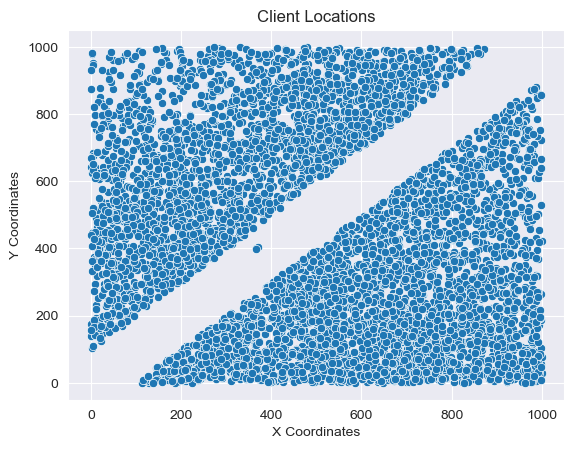

In [4]:
#1
sns.scatterplot(x='x', y='y', data=df)
plt.title('Client Locations')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

The plotted locations show that there is unhabited place in the middle. That could be river or canal for example.

In [19]:
num_of_depots = 3

X = df[['x', 'y']].values
kmeans = KMeans(n_clusters=num_of_depots, random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

print("Optimal Centroid Locations:")
for idx, (x, y) in enumerate(centroids):
    print(f"Depot {idx + 1}: (X: {x:.2f}, Y: {y:.2f})")

Optimal Centroid Locations:
Depot 1: (X: 180.90, Y: 546.02)
Depot 2: (X: 626.31, Y: 179.10)
Depot 3: (X: 641.78, Y: 758.34)


### Then we'll attach the information on the closest depot to each client:

In [20]:
df['depot_id'] = kmeans.labels_
df.head(10)

,clientid,x,y,depot_id
0,1,622.771572,164.857623,1
1,2,416.357298,630.193634,0
2,3,292.735020,567.333231,0
3,4,737.211288,166.225676,1
4,5,540.475375,682.912298,2
5,6,535.469492,318.439661,1
6,7,640.380050,870.833221,2
7,8,235.772075,359.048203,0
8,9,481.896884,661.491838,2
9,10,730.032789,312.177817,1


### Then we make a scatterplot with different colors so that the same colour are served by the same depot:


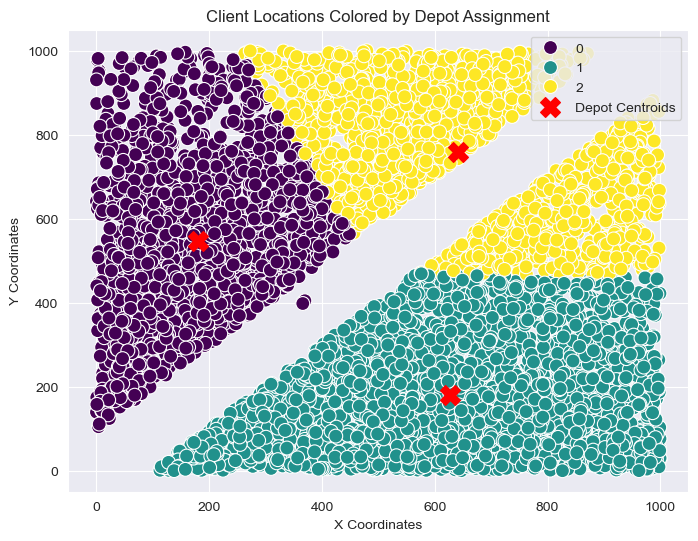

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', data=df, hue='depot_id',palette='viridis',s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Depot Centroids')
plt.title('Client Locations Colored by Depot Assignment')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.show()

### Then we'll try with different amounts of depots. Here is for 10 depots for example:

![Alt text](output.png)

**Also We find that when we increase the amount of depots the computation time of the K-means clustering increases.**

### Then we replace k-means with agglomerative clustering:

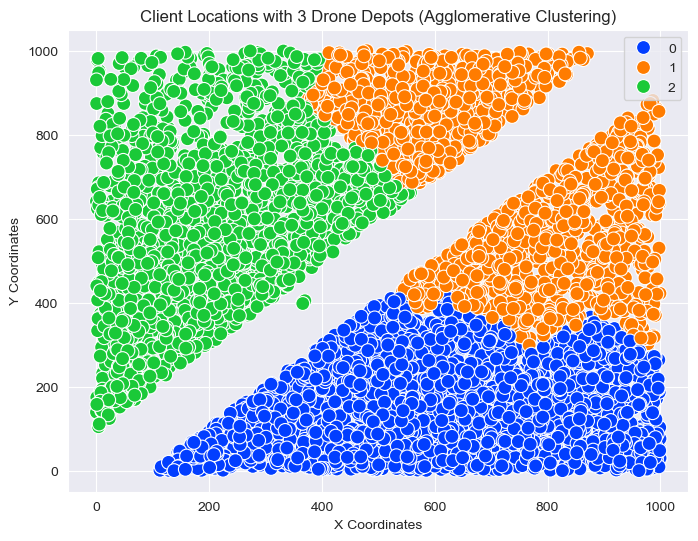

In [18]:
#perform agglomerative hiearchial clustering
agglomerative = AgglomerativeClustering(n_clusters=num_of_depots)
df['depot_id'] = agglomerative.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df, hue='depot_id', palette='bright', s=100)
    
plt.title(f'Client Locations with {num_of_depots} Drone Depots (Agglomerative Clustering)')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.show()

Then with 10 depots: 


![Alt text](output2.png)


 Since agglomerative clustering does not provide centroids, we can't mark centroids like K-means, and we explored that the locations of the optimal depots varied compared to those identified using K means. 

## 5. Evalutation
Both clustering methods have yielded effective results, establishing a well-distributed network of depots that serve a balanced number of customers.

K-means Clustering: This method identifies distinct clusters with clear centroids, representing the optimal locations for the depots. By minimizing the distance between customers and their respective depots, K-means enhances operational efficiency in delivery logistics.

Agglomerative Hierarchical Clustering: Unlike K-means, this approach does not provide explicit centroids but instead builds a hierarchy of clusters based on the proximity of customer locations. This method offers greater flexibility in understanding the natural groupings of clients, allowing for more nuanced insights into customer distributions.

However, in the context of minimizing distances and ensuring efficient deliveries, K-means proves to be the superior choice. Its straightforward approach allows for clear identification of depot locations that optimize customer access and reduce delivery times.


## 6. Deployment
Once the optimal depot locations are identified, the next step involves integrating the results into the company’s logistics system. The depot coordinates will be used to:

- Plan the physical setup of drone hubs.
- Assign customer deliveries to the nearest depot.
- Adjust drone routes to minimize travel time and energy consumption.